<a href="https://colab.research.google.com/github/atul2110/Health_Insurance/blob/main/Health_Insurance_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


**Loading** **Dataset**

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**Data Cleaning**

In [4]:
# To check type and null value in each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# to check statistical information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


**Feature Engineering**

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
Male=pd.get_dummies(df['sex'],drop_first=True)

In [8]:
Male

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [9]:
# add male to data
# where there is male there is 1 and where there is female there is 0
df=pd.concat([df,Male],axis=1)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1


In [11]:
Smoker=pd.get_dummies(df['smoker'],drop_first=True)
df=pd.concat([df,Smoker],axis=1)

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.9,0,yes,southwest,16884.92,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0
4,32,male,28.9,0,no,northwest,3866.86,1,0


In [13]:
# To rename the columns
df=df.rename({'yes':'Smoker'},axis=1)
df=df.rename({'male':'Sex'},axis=1)
# df=df.rename(columns={'yes':'Smoker'}) you can use either
# rankings_pd.columns = rankings_pd.columns.str.replace('test', 'Col_TEST')

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Sex,Smoker
0,19,female,27.9,0,yes,southwest,16884.92,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0
4,32,male,28.9,0,no,northwest,3866.86,1,0


**Exploratory Data Analysis**

In [15]:
# distribution of gender parameter
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 1200x600 with 0 Axes>

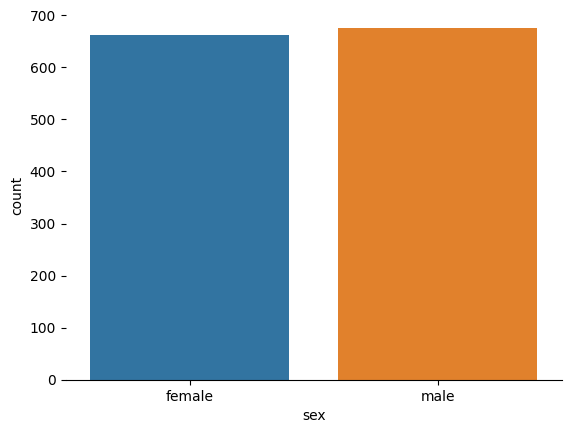

<Figure size 1200x600 with 0 Axes>

In [16]:
sns.countplot(x='sex',data=df)
# style the plot
sns.set_style("white")
sns.despine(left=True)
plt.figure(figsize=(12,6))

<Axes: xlabel='sex', ylabel='charges'>

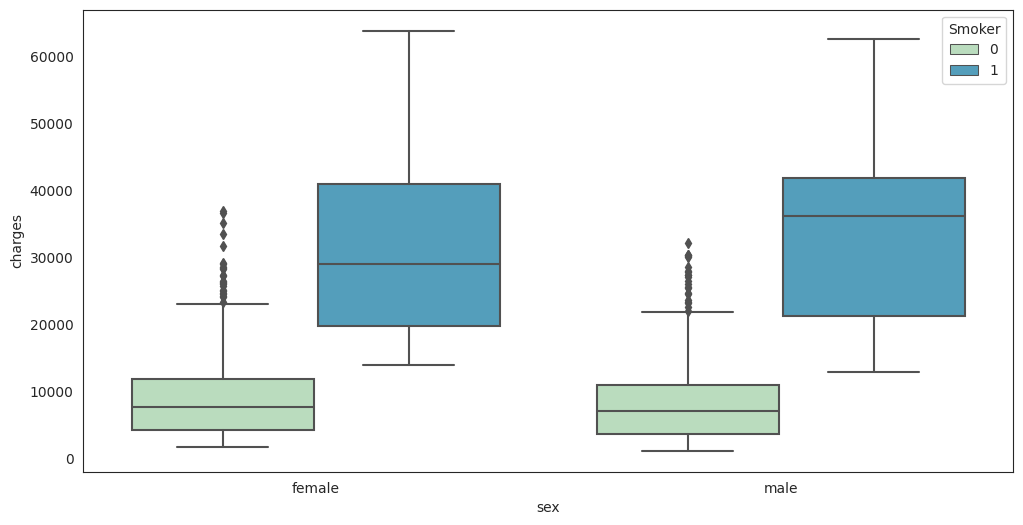

In [17]:
# Relationship of smoking and gender to charges
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.boxplot(x='sex',y='charges',data=df,hue='Smoker',palette='GnBu')

<Axes: xlabel='age', ylabel='charges'>

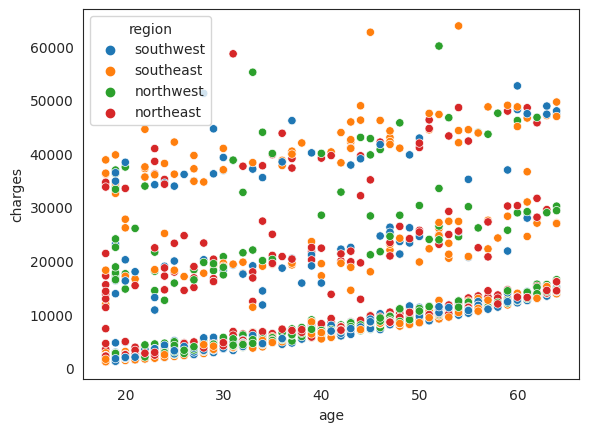

In [18]:
sns.scatterplot(x="age",y='charges',data=df,hue='region')

In [19]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='bmi', ylabel='charges'>

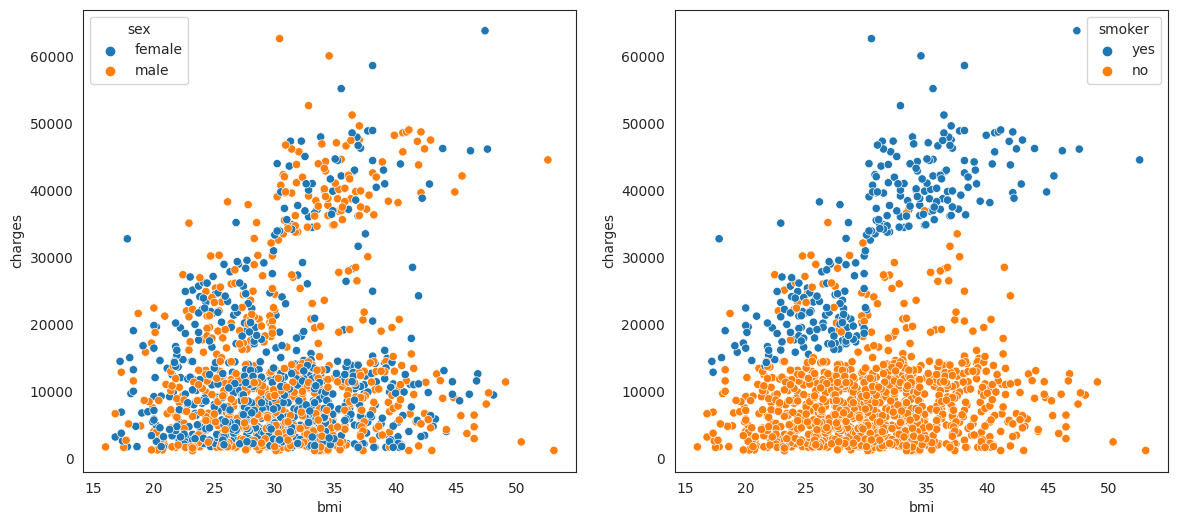

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x='bmi',y='charges',data=df,hue='sex',ax=ax[0])
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker',ax=ax[1])

In [21]:
# now drop the categorical column
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [22]:
df.head()

,age,bmi,children,charges,Sex,Smoker
0,19,27.9,0,16884.92,0,1
1,18,33.8,1,1725.55,1,0
2,28,33.0,3,4449.46,1,0
3,33,22.7,0,21984.47,1,0
4,32,28.9,0,3866.86,1,0


**Outliers Removal**

<Axes: >

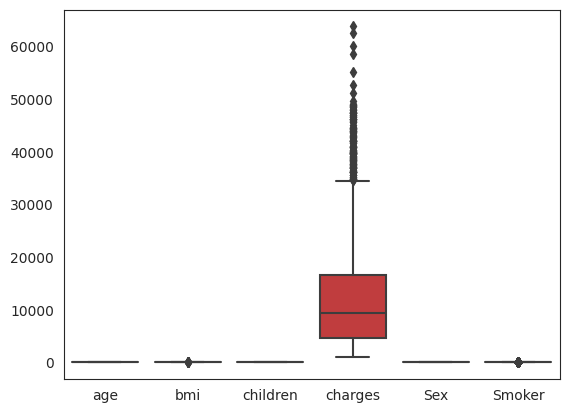

In [23]:
# checking outliers
sns.boxplot(data=df)

In [24]:
# We are going to drop some value whose charges is greater than 60,000 or very close to 60,000
for i in df['charges']:
    if(i>50000):
        print(i)

51194.56
63770.43
58571.07
55135.4
52590.83
60021.4
62592.87


In [25]:
df=df[df.charges <50000]

In [26]:
# correlation matrix
df.corr()

,age,bmi,children,charges,Sex,Smoker
age,1.000000,0.108397,0.043197,0.304561,-0.022425,-0.028377
bmi,0.108397,1.000000,0.014741,0.187301,0.048913,-0.005939
children,0.043197,0.014741,1.000000,0.076993,0.016042,0.011084
charges,0.304561,0.187301,0.076993,1.000000,0.057519,0.785617
Sex,-0.022425,0.048913,0.016042,0.057519,1.000000,0.075786
Smoker,-0.028377,-0.005939,0.011084,0.785617,0.075786,1.000000


<Axes: >

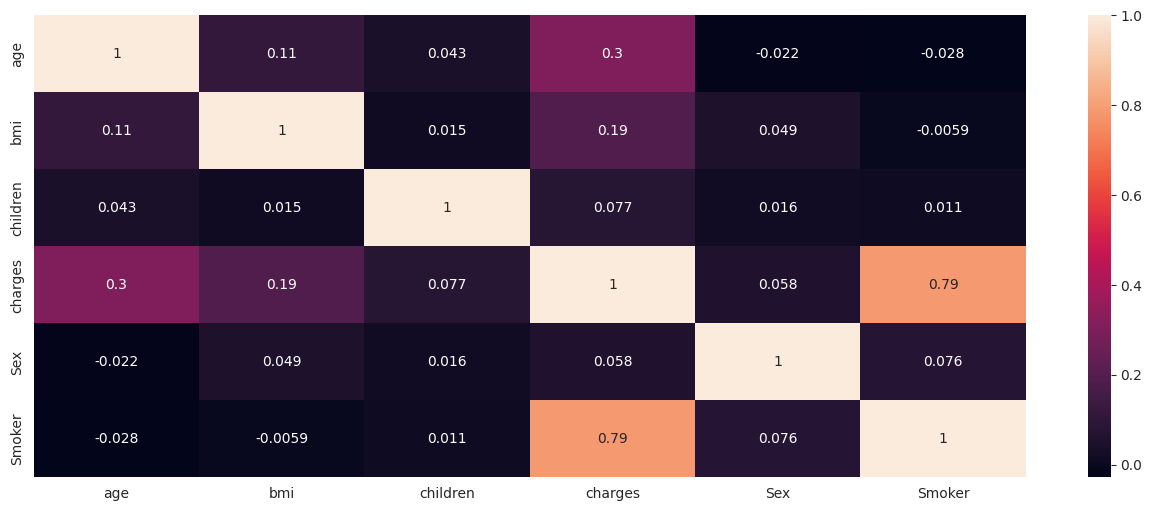

In [27]:
# heatmap
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True) # annot is used for labelling

**Splitting Data**

In [28]:
x=df.drop(['charges'],axis=1) # we drop charges column
y=df['charges']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**Checking the shape of test and train data**

In [31]:
x_train.shape

(931, 5)

In [32]:
x_test.shape

(400, 5)

In [33]:
y_train.shape

(931,)

In [34]:
y_test.shape

(400,)

In [35]:
print(x.head())

   age   bmi  children  Sex  Smoker
0   19  27.9         0    0       1
1   18  33.8         1    1       0
2   28  33.0         3    1       0
3   33  22.7         0    1       0
4   32  28.9         0    1       0


**Model Building**

In [36]:
model=XGBRegressor(n_jobs=-
1,n_estimators=1000,early_stopping_rounds=50,random_state=42)
model.fit(x_train,y_train , eval_set=[(x_train,y_train),(x_test,y_test)])
prediction_train=model.predict(x_train)
prediction_test=model.predict(x_test)

[0]	validation_0-rmse:12411.82028	validation_1-rmse:13396.72092
[1]	validation_0-rmse:9237.63311	validation_1-rmse:9971.30561
[2]	validation_0-rmse:7120.93686	validation_1-rmse:7710.22252
[3]	validation_0-rmse:5712.11182	validation_1-rmse:6313.10001
[4]	validation_0-rmse:4816.56431	validation_1-rmse:5503.02975
[5]	validation_0-rmse:4260.11417	validation_1-rmse:5030.47002
[6]	validation_0-rmse:3869.01786	validation_1-rmse:4813.45756
[7]	validation_0-rmse:3643.49413	validation_1-rmse:4700.45595
[8]	validation_0-rmse:3502.84073	validation_1-rmse:4668.12361
[9]	validation_0-rmse:3375.51104	validation_1-rmse:4636.61103
[10]	validation_0-rmse:3267.44720	validation_1-rmse:4647.11132
[11]	validation_0-rmse:3198.97476	validation_1-rmse:4659.51110
[12]	validation_0-rmse:3162.08923	validation_1-rmse:4659.18505
[13]	validation_0-rmse:3099.11173	validation_1-rmse:4681.36152
[14]	validation_0-rmse:3053.37378	validation_1-rmse:4689.12100
[15]	validation_0-rmse:3002.94181	validation_1-rmse:4713.47626


In [37]:
r2_score(y_train,prediction_train) # for training data

0.9124120460173208

In [38]:
r2_score(y_test,prediction_test) # for test data

0.8579732113707598

In [39]:
index_y_test=[i for i in range(1,401)]
len(index_y_test)

400

In [40]:
index_y_train=[i for i in range(1,932)]
len(index_y_train)

931

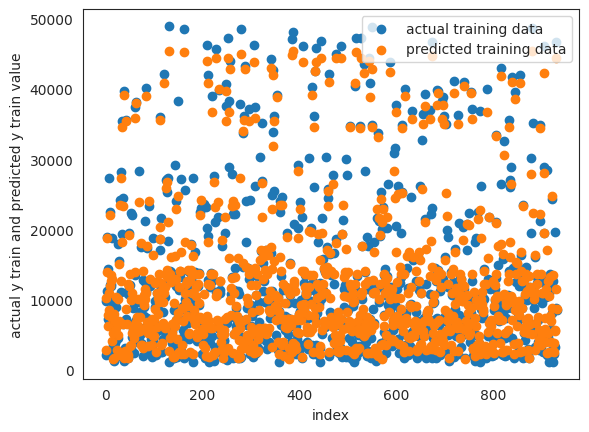

In [41]:
plt.scatter(index_y_train,y_train,label='actual training data')
plt.scatter(index_y_train,prediction_train,label='predicted training data')
plt.xlabel("index")
plt.ylabel("actual y train and predicted y train value")
plt.legend()
plt.show()